# Text Classification - Embedding FT Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the Direct Finetuned model.

## $\color{blue}{Load-Results:}$


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [4]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal'],
      dtype='object')

In [5]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [6]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

modify below

In [7]:
df['embedding_ft_pseudo_book'] = df['embedding_ft_preds'].map(pred2book)

...saving

In [8]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [9]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal'],
      dtype='object')

## $\color{blue}{Scores:}$


In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [11]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


modify below

In [12]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['embedding_ft_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [13]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.38381742738589214

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [14]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.32896936049582154
weighted precision: 0.43343166521803606
micro precision: 0.38381742738589214


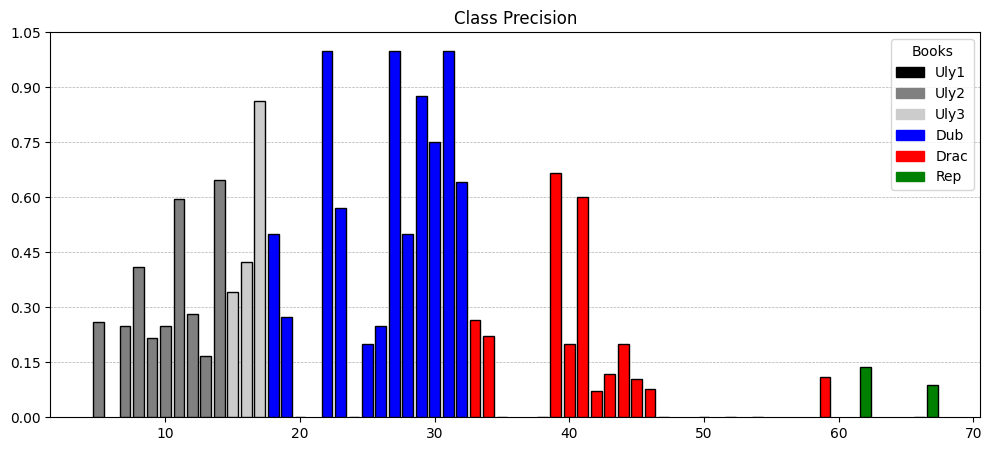

In [15]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [16]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.28232643854290373
weighted recall: 0.38381742738589214
micro recall: 0.38381742738589214


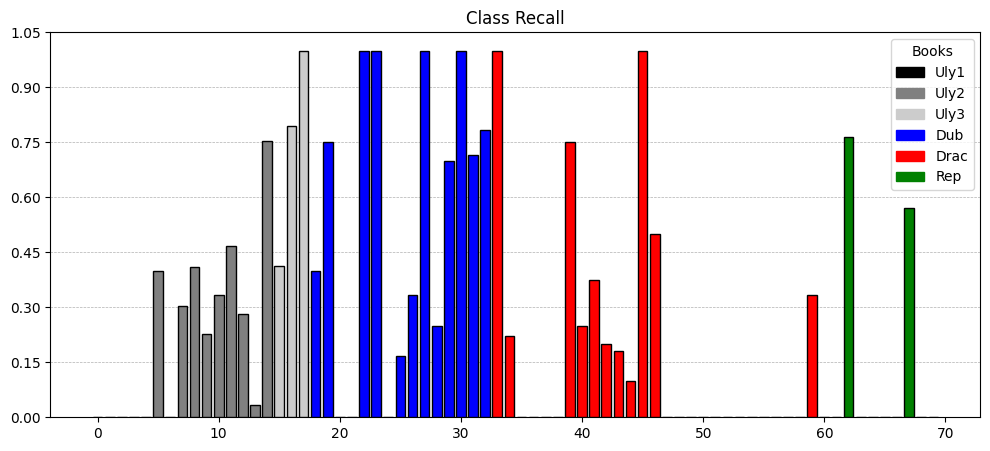

In [17]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [18]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.2251035996345813
weighted f1: 0.33590521919891864
micro f1: 0.38381742738589214


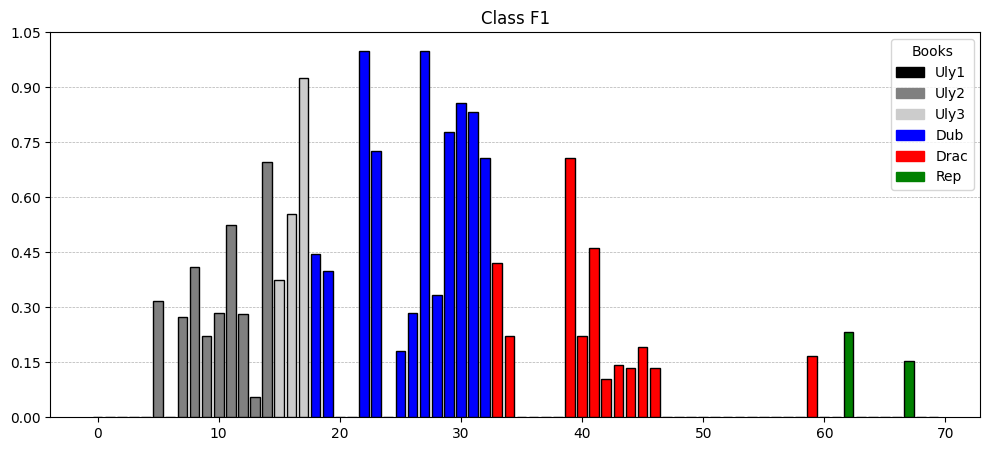

In [19]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

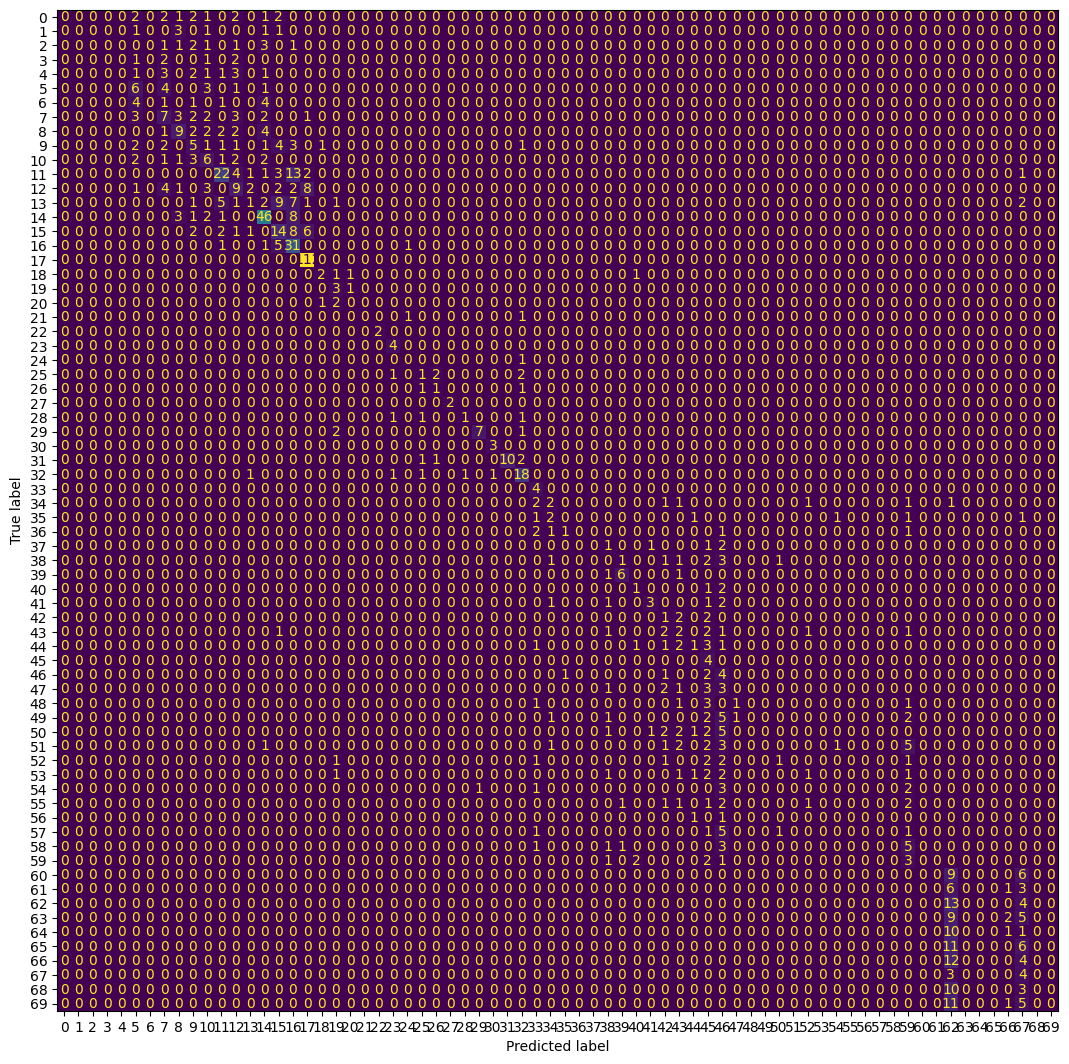

In [20]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [21]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal'],
      dtype='object')

In [22]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['embedding_ft_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [23]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.8786307053941909

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [24]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.893996027607621
weighted precision: 0.8881220168942451
micro precision: 0.8786307053941909


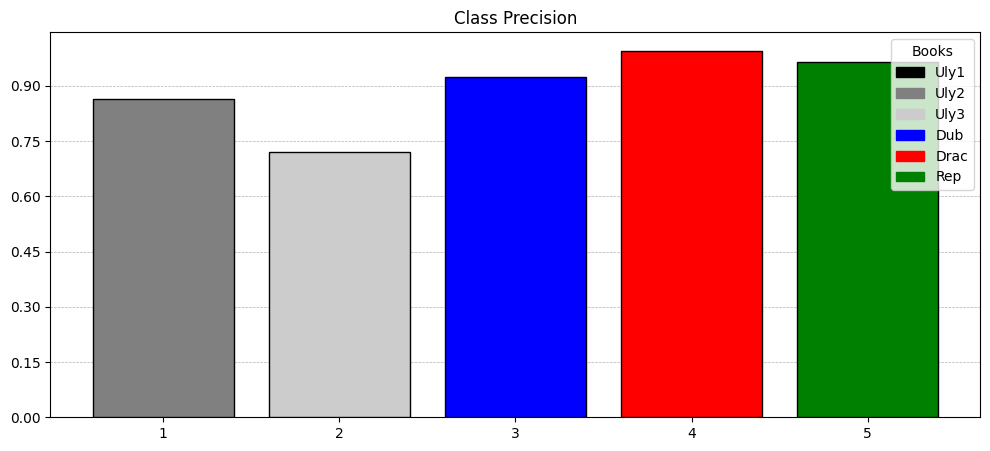

In [25]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.7776793844381054
weighted recall: 0.8786307053941909
micro recall: 0.8786307053941909


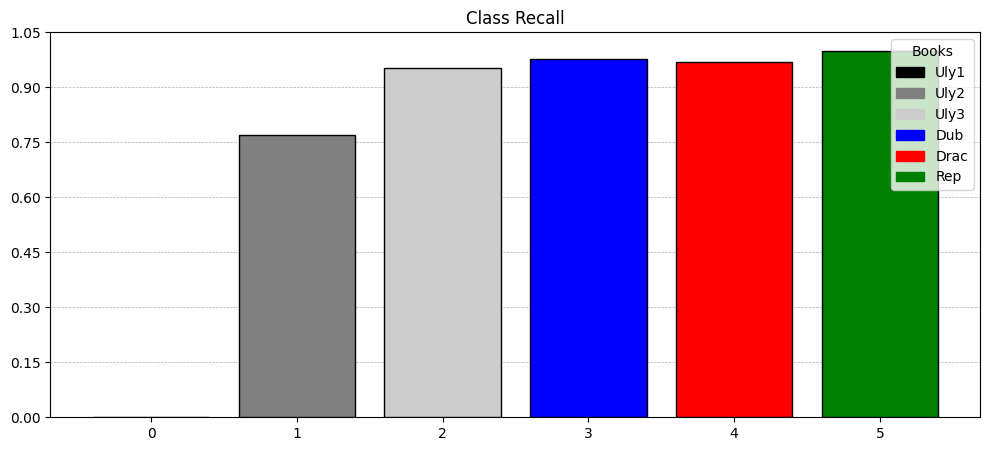

In [ ]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [26]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.7580302079601108
weighted f1: 0.8655032985104902
micro f1: 0.8786307053941909


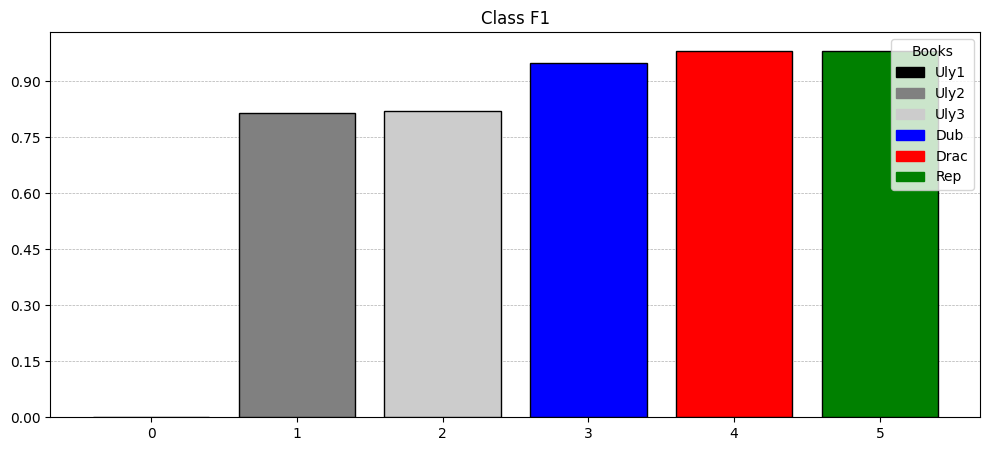

In [27]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

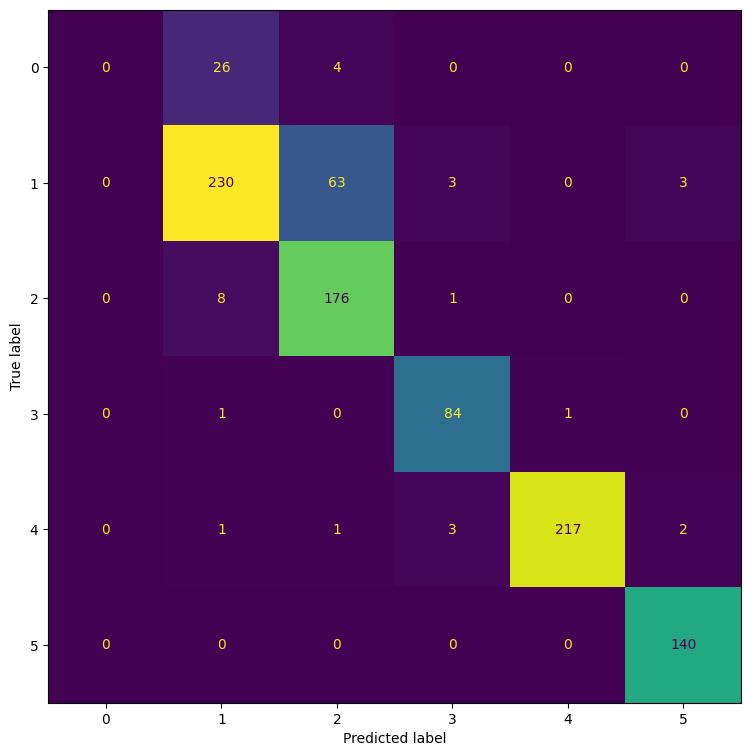

In [28]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [ ]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book'],
      dtype='object')

In [ ]:
df_wrong_book = df[df.book_idx != df.embedding_ft_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(117, 25)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["embedding_ft_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["embedding_ft_preds"]}')


 ------
Book: 1, Chapter: 13
Stap my vitals, said he, them was always the sentiments of honest Frank Costello which I was bred up most particular to honour thy father and thy mother that had the best hand to a rolypoly or a hasty pudding as you ever see what I always looks back on with a loving heart.
Pred Book: 2, Chapter: 15

 ------
Book: 1, Chapter: 13
And yonder about that grey urn where the water moves at times in thoughtful irrigation you saw another as fragrant sisterhood, Floey, Atty, Tiny and their darker friend with I know not what of arresting in her pose then, Our Lady of the Cherries, a comely brace of them pendent from an ear,
Pred Book: 2, Chapter: 16

 ------
Book: 1, Chapter: 13
And sir Leopold sat with them for he bore fast friendship to sir Simon and to this his son young Stephen and for that his languor becalmed him there after longest wanderings insomuch as they feasted him for that time in the honourablest manner. Ruth red him, love led on with will to wander, l

<ipython-input-36-6ea1f80dad05>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [ ]:
df_wrong_chapter = df[df.chapter_idx != df.embedding_ft_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(594, 25)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["embedding_ft_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["embedding_ft_preds"]}')


 ------
Book: 1, Chapter/ 12
Care of P. O. Dolphin’s Barn. Are you not happy in your? Naughty darling. At Dolphin’s barn charades in Luke Doyle’s house. Mat Dillon and his bevy of daughters: Tiny, Atty, Floey, Maimy, Louy, Hetty. Molly too. Eightyseven that was.
Pred Book: 1, Chapter: 10

 ------
Book: 5, Chapter/ 63
And is not the creation of justice the institution of a natural order and government of one by another in the parts of the soul, and the creation of injustice the production of a state of things at variance with the natural order?   Exactly so, he said.
Pred Book: 5, Chapter: 67

 ------
Book: 3, Chapter/ 20
Once or twice the young lady glanced at me over her shoulder.   I lingered before her stall, though I knew my stay was useless, to make my interest in her wares seem the more real. Then I turned away slowly and walked down the middle of the bazaar. I allowed the two pennies to fall against the sixpence in my pocket.
Pred Book: 3, Chapter: 19

 ------
Book: 1, Chapter/

<ipython-input-39-84f57f0fd1b1>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [ ]:
D = {
    'model': ["embedding_ft"],
    'params': [109885310],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [ ]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [ ]:
df_new = pd.DataFrame(D)

In [ ]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [ ]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210
3,vanilla_moe_e2e_soft_forest,3061832,0.870332,"[0.6296296296296297, 0.8448844884488449, 0.877...",0.834169,0.869344,"[0.5666666666666667, 0.8561872909698997, 0.848...",0.826442,0.870332,"[0.5964912280701754, 0.8504983388704319, 0.862...",...,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.571...",0.468744,0.565878,"[0.6923076923076923, 0.5714285714285714, 0.4, ...",0.455724,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.470...",0.441130,0.549578
4,vanilla_moe_hard_pre,1308029,0.857884,"[0.5641025641025641, 0.8614864864864865, 0.862...",0.810109,0.862754,"[0.7333333333333333, 0.8528428093645485, 0.848...",0.839826,0.857884,"[0.6376811594202898, 0.8571428571428571, 0.855...",...,0.566390,"[0.6875, 0.6666666666666666, 0.352941176470588...",0.476456,0.590392,"[0.8461538461538461, 0.5714285714285714, 0.6, ...",0.457954,0.566390,"[0.7586206896551724, 0.6153846153846154, 0.444...",0.436410,0.559260
5,direct_ft,109885310,0.902490,"[0.75, 0.896551724137931, 0.8835978835978836, ...",0.879199,0.901942,"[0.7, 0.8695652173913043, 0.9027027027027027, ...",0.876884,0.902490,"[0.7241379310344828, 0.8828522920203735, 0.893...",...,0.613071,"[0.75, 0.7777777777777778, 0.6666666666666666,...",0.540205,0.624456,"[0.9230769230769231, 1.0, 0.2, 0.3333333333333...",0.540334,0.613071,"[0.8275862068965517, 0.875, 0.3076923076923077...",0.522846,0.607524
6,embedding_ft,109885310,0.878631,"[nan, 0.8646616541353384, 0.7213114754098361, ...",0.893996,0.888122,"[0.0, 0.7692307692307693, 0.9513513513513514, ...",0.777679,0.878631,"[0.0, 0.8141592920353983, 0.8205128205128205, ...",...,0.383817,"[nan, nan, nan, nan, nan, 0.2608695652173913, ...",0.328969,0.433432,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.30434782...",0.282326,0.383817,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.3157894736842105, ...",0.225104,0.335905


In [ ]:
path = "class/results/"
df_res.to_pickle(path + "master_results.pk")